In [1]:
# CNN

import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow


In [3]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
import tensorflow as tf

In [5]:
mnist=tf.keras.datasets.mnist
# Modified National Institute of Standards and technology database
# It has an connection of greyscall images with handwritten digits from 0 to 9

In [6]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from 'C:\\Users\\dell\\anaconda3\\Lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

In [7]:
print(mnist)

<module 'keras.api._v2.keras.datasets.mnist' from 'C:\\Users\\dell\\anaconda3\\Lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>


In [8]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train,x_test=x_train/255.0,x_test/255.0

11490434/11490434 [==============================] - 14s 1us/step


In [9]:
model1=tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),tf.keras.layers.Dense(128,activation='relu'),
                                   tf.keras.layers.Dropout(0.2),tf.keras.layers.Dense(10,activation='softmax')])

In [16]:
# x_train,x_test=x_train/255.0,x_test/255.0
# 1)Why to divide by 255
# When we are working with image data,the pixel values are integers in the range of [0,255].so,dividing it by 255.0 scales these values to the range of[0,1
# working with the smaller values increase the stability of optimization algorithm]

# tf.keras.layers.Dense(128,activation='relu')
# 2)Why 128
# It is the specific number of neurons or units in the Dense later
# relu-->Rectified LInear Unit,It helps to add
# non-linearity to our algorithm

In [18]:
model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model1.fit(x_train,y_train,epochs=5)

Epoch 1/5

1875/1875 [==============================] - 15s 7ms/step - loss: 0.0665 - accuracy: 0.9786
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0562 - accuracy: 0.9818
Epoch 3/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0524 - accuracy: 0.9831
Epoch 4/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0453 - accuracy: 0.9857
Epoch 5/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0450 - accuracy: 0.9850


In [20]:
test_loss,test_accuracy=model1.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0658 - accuracy: 0.9808


In [21]:
print(test_loss)
print(test_accuracy)

0.06579668074846268
0.9807999730110168


In [22]:
# ------->Activation Function
# Relu
# It is one of the most widely used activation function,
# It replaces all negative values with zero,leaving the positivevalues unchanged 

# Sigmoid
# sigmoid reduces the output between 0 and 1,making it suitable for binary classification problems

# Tanh(Hyperbolic Tangent):
# It reduces the output between -1 and 1

# Softmax
# Its is mostly used in output layer

# leaku Relu
# It is a another varien of Relu that allows a samll positive gradient for negatives just to avoid dead neurons

In [27]:
# Project:1

# Convert image to greyscall using CNN

import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import matplotlib.pyplot as plt
import numpy as np

#### load the RGB image
image_path=r"C:\Users\dell\Pictures\Saved Pictures\siri.jpg"
original_image=load_img(image_path,target_size=(224,224))
original_array=img_to_array(original_image)
print(original_array)

In [33]:
image_path=r"C:\Users\dell\Pictures\Saved Pictures\siri.jpg"
original_image=load_img(image_path,target_size=(224,224))
original_array=img_to_array(original_image)
original_array=original_array/255.0
print(original_array)

[[[0.6156863  0.6156863  0.6156863 ]
  [0.25882354 0.25882354 0.25882354]
  [0.32941177 0.32941177 0.32941177]
  ...
  [0.78039217 0.78039217 0.78039217]
  [0.8980392  0.8980392  0.8980392 ]
  [0.91764706 0.91764706 0.91764706]]

 [[0.36078432 0.36078432 0.36078432]
  [0.39215687 0.39215687 0.39215687]
  [0.44313726 0.44313726 0.44313726]
  ...
  [0.8235294  0.8235294  0.8235294 ]
  [0.92941177 0.92941177 0.92941177]
  [0.8117647  0.8117647  0.8117647 ]]

 [[0.5372549  0.5372549  0.5372549 ]
  [0.3254902  0.3254902  0.3254902 ]
  [0.21568628 0.21568628 0.21568628]
  ...
  [1.         1.         1.        ]
  [0.83137256 0.83137256 0.83137256]
  [0.94509804 0.94509804 0.94509804]]

 ...

 [[0.4509804  0.4509804  0.4509804 ]
  [0.42352942 0.42352942 0.42352942]
  [0.42352942 0.42352942 0.42352942]
  ...
  [0.7411765  0.7411765  0.7411765 ]
  [0.972549   0.972549   0.972549  ]
  [0.60784316 0.60784316 0.60784316]]

 [[0.46666667 0.46666667 0.46666667]
  [0.4392157  0.4392157  0.4392157 ]


In [35]:
original_array.shape

(224, 224, 3)

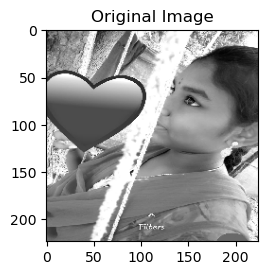

In [34]:
plt.figure(figsize=(6,6))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(original_array)

In [37]:
# convert image to grey scale
model=models.Sequential()

# Sequentials()-->it allows us to create a linear stack of layers in a neural network
# you can add one layer at neural network at a time and each layer has connection only to the previous and next layer

model.add(layers.Conv2D(1,(3,3),activation='relu',input_shape=(224,224,3))) 
# conv2D--->It represents 2D conventional layer

# Conventional Layer--->It performs element wise operations i.e;Addition,Multiplication,Subtraction,Division

In [38]:
# layers.Conv2D(1)--->1 is used to mention the  umber of filters in the conventional layer
# (3,3)--->size of a filter
# (224,224,3)--->224*224-->pixels with 3 color channel(RGB)

In [43]:
model.add(layers.MaxPooling2D((2,2)))
# MaxPooling2D()-->It is used to set the dimension of input data and extract important fratures from conv2D layer
model.summary()

# To reshape the image
input_image=np.expand_dims(original_array,axis=0)
greyscale=model.predict(input_image)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 222, 222, 1)       28        
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 1)       0         
 D)                                                              
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 55, 55, 1)         0         
 g2D)                                                            
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 27, 27, 1)         0         
 g2D)                                                            
                                                                 
Total params: 28 (112.00 Byte)
Trainable params: 28 (112.00 Byte)
Non-trainable params: 0 (0.00 Byte)
__________________

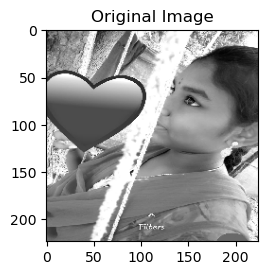

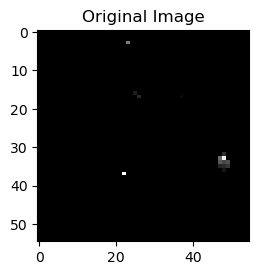

In [45]:
plt.figure(figsize=(6,6))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(original_array)

plt.figure(figsize=(6,6))
plt.subplot(1,2,2)
plt.title("Original Image")
plt.imshow(np.squeeze(greyscale),cmap='gray')

In [ ]:
df=pd.read(r"C:\Users\dell\Desktop\archive (4)\train")

In [ ]:
# Project 2:
# Detect flowers based on images

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib import styles

# Model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# preprocess
from keras.preprocessing.image import ImagedataGenerator

from keras import backend as k
from keras.models import Sequential
from Keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

from keras.layers import Dropout,Flatten,Activation
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization

import tensorflow as tf
import random as rn

import cv2
import numpy as np
from tqdm import tqdm
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image

In [ ]:
X=[]
Z=[]
IMG_SIZE=150

FLOWER_DAISEY_DIR=
FLOWER_SUMFLOWER_DIR=
FLOWER_TULIP_DIR=
FLOWER_DANDI_DIR=
FLOWER_ROSE_DIR=

In [ ]:
def assign_label(img,flower_type):
    return flower_type

In [ ]:
# tqdm-->IT creats a progres bar from the loop
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path=os.path.join(DIR,img)
        img=cv2.imread(path,cv2.IMREAD_COLOR)
        img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        
        x.append(np.array(img))
        z.append(str(label))

In [ ]:
make_train_data("Daisy",FLOWER_DAISEY_DIR)
print(lenn(X))

In [ ]:
make_train_data('Sunflower',FLOWER_DAISEY_DATA)
print(len(X))

In [ ]:
make_train_data('Tulip',FLOWER_DAISEY_DATA)
print(len(X))

In [ ]:
make_train_data('Dandelion',FLOWER_DAISEY_DATA)
print(len(X))

In [ ]:
make_train_data('Rose',FLOWER_DAISEY_DATA)
print(len(X))

In [ ]:
print(X)

In [ ]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)

for row in range(5):
    for col in range(2):
        l=rn.randint(0,len(Z))
        ax[row,col].imshow(X[l])
        ax[row,col].set_title("Flower:"+Z[1])
    plt.tight_layout()

In [1]:
# Project 2:
# Detect flowers based on images

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib import style

# Model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# preprocess
from keras.preprocessing.image import ImageDataGenerator

from keras import backend as k
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

from keras.layers import Dropout,Flatten,Activation
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization

import tensorflow as tf
import random as rn

import cv2
import numpy as np
from tqdm import tqdm
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image

ModuleNotFoundError: No module named 'cv2'